In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
from Domain import Domain
import numpy as np

domain = Domain("D:\\dev\\reconstrucao\\Malha\\cuba1.msh", 16)

DEBUG:matplotlib:matplotlib data path: c:\Users\ASantos\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\ASantos\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', 'encodings.cp1252', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib._abc', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'importlib.machinery', 'google', 'google.

INFO:root:finish local matrix calculation (102)
INFO:root:starting local matrix calculation [103]
INFO:root:finish local matrix calculation (103)
INFO:root:starting local matrix calculation [104]
INFO:root:finish local matrix calculation (104)
INFO:root:starting local matrix calculation [105]
INFO:root:finish local matrix calculation (105)
INFO:root:starting local matrix calculation [106]
INFO:root:finish local matrix calculation (106)
INFO:root:starting local matrix calculation [107]
INFO:root:finish local matrix calculation (107)
INFO:root:starting local matrix calculation [108]
INFO:root:finish local matrix calculation (108)
INFO:root:starting local matrix calculation [109]
INFO:root:finish local matrix calculation (109)
INFO:root:starting local matrix calculation [110]
INFO:root:finish local matrix calculation (110)
INFO:root:starting local matrix calculation [111]
INFO:root:finish local matrix calculation (111)
INFO:root:starting local matrix calculation [112]
INFO:root:finish loc

In [8]:
condutividade = np.ones(domain.nElements) * 100
domain.updateGlobal(condutividade)
# m_inverse = np.linalg.inv(domain.m_global)
domain.findCenter()
print(domain.center_node)

DEBUG:root:updating global [      0]
DEBUG:root:updating global [      1]
DEBUG:root:updating global [      2]
DEBUG:root:updating global [      3]
DEBUG:root:updating global [      4]
DEBUG:root:updating global [      5]
DEBUG:root:updating global [      6]
DEBUG:root:updating global [      7]
DEBUG:root:updating global [      8]
DEBUG:root:updating global [      9]
DEBUG:root:updating global [     10]
DEBUG:root:updating global [     11]
DEBUG:root:updating global [     12]
DEBUG:root:updating global [     13]
DEBUG:root:updating global [     14]
DEBUG:root:updating global [     15]
DEBUG:root:updating global [     16]
DEBUG:root:updating global [     17]
DEBUG:root:updating global [     18]
DEBUG:root:updating global [     19]
DEBUG:root:updating global [     20]
DEBUG:root:updating global [     21]
DEBUG:root:updating global [     22]
DEBUG:root:updating global [     23]
DEBUG:root:updating global [     24]
DEBUG:root:updating global [     25]
DEBUG:root:updating global [     26]
D

DEBUG:root:updating global [     35]
DEBUG:root:updating global [     36]
DEBUG:root:updating global [     37]
DEBUG:root:updating global [     38]
DEBUG:root:updating global [     39]
DEBUG:root:updating global [     40]
DEBUG:root:updating global [     41]
DEBUG:root:updating global [     42]
DEBUG:root:updating global [     43]
DEBUG:root:updating global [     44]
DEBUG:root:updating global [     45]
DEBUG:root:updating global [     46]
DEBUG:root:updating global [     47]
DEBUG:root:updating global [     48]
DEBUG:root:updating global [     49]
DEBUG:root:updating global [     50]
DEBUG:root:updating global [     51]
DEBUG:root:updating global [     52]
DEBUG:root:updating global [     53]
DEBUG:root:updating global [     54]
DEBUG:root:updating global [     55]
DEBUG:root:updating global [     56]
DEBUG:root:updating global [     57]
DEBUG:root:updating global [     58]
DEBUG:root:updating global [     59]
DEBUG:root:updating global [     60]
DEBUG:root:updating global [     61]
D

16


In [11]:
print(np.min(domain.mesh.cells[0].data,0))
print(np.max(domain.mesh.cells[0].data,0))

[ 0  0  0 16]
[5011 5011 5011 5011]


In [6]:
domain.saveNodeValues("D:\\dev\\reconstrucao\\voltage.msh", m_voltage[0])

In [3]:
m_current = np.zeros((domain.nEletrodes, domain.nNodes))
for x in range(0,domain.nEletrodes):
    m_current[x, x] = 0.001
    m_current[x, (x+3) % domain.nEletrodes] = -0.001


In [9]:
#domain.m_global[16, :] = 0
#domain.m_global[: ,16] = 0
#domain.m_global[16,16] = 1
m_voltage = np.zeros((domain.nEletrodes, domain.nNodes))
for x in range(0, domain.nEletrodes):
    m_voltage[x] = np.linalg.solve(domain.m_global, m_current[x])

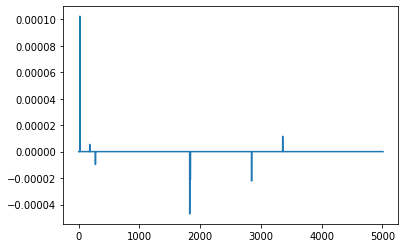

In [13]:
plt.plot(domain.m_global[:,20])
plt.show()

In [27]:
#for (x,p) in zip(range(0,domain.nNodes), domain.mesh.points):
print((domain.mesh.points[19]))
print(domain.pos_center)
print(domain.pos_span)
print(domain.pos_min)
print(domain.pos_max)

[0.106066 0.106066 0.01    ]
[0.3  0.3  0.02]
[0.3  0.3  0.02]
[-0.15 -0.15 -0.01]
[0.15 0.15 0.01]


In [14]:
x, y = np.meshgrid(domain.m_global)
plt.scatter(x, y)


ValueError: not enough values to unpack (expected 2, got 1)